# Using Neurphys

# Installation: follow instructions on Github page

# Neurphys
- Import ephys and imaging data into pandas dataframes
- Manipulate those dataframes
- Turn data into (almost) figure-worthy PDFs

# Usage couldn't be simpler

In [1]:
import neurphys as nu

# df = nu.read_abf(<'path/filename.abf'>)

data = nu.read_abf('../data_files/2015_01_30_0003.abf')
data.tail()

/Users/chadestep/anaconda/lib/python3.5/site-packages/neo-0.4.0.dev0-py3.5.egg/neo/io/axonio.py:262: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  nbchannel)).astype('f')


channel_1    primary     time
sweep                                         
sweep002 699995   0.003601 -56.823727  69.9995
         699996   0.004089 -58.166500  69.9996
         699997   0.003601 -58.410641  69.9997
         699998   0.003479 -57.128902  69.9998
         699999   0.004150 -57.373043  69.9999

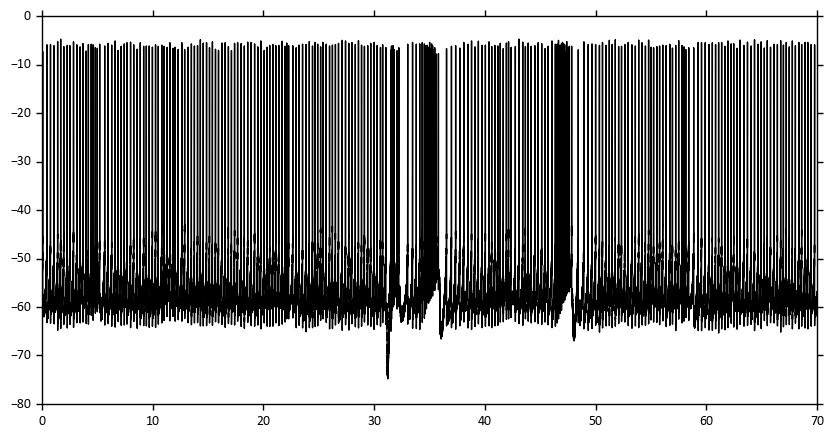

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('estep_style')

plt.plot(data.xs('sweep002')['time'],data.xs('sweep002')['primary']);

# Gives you a pandas DataFrame object
### [Lots of options to manipulate data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

---

# _Neurphys_ is built on top of _pandas_ 

# _Best of both worlds_

# So what is Neurphys?

## Let's look at a smoothing example

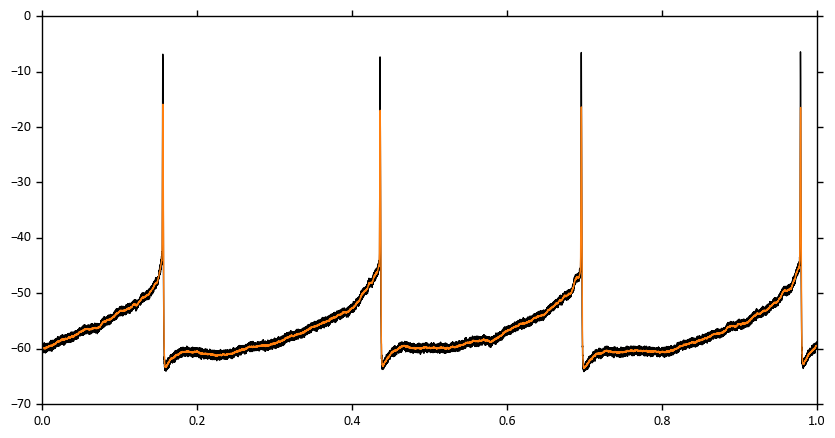

In [3]:
"""
Let's plot the original data and overlay the smoothed data (made through
a rolling mean)
"""
# first ten thousand data points of the original dataframe
df = data.iloc[:10000]

# original data
plt.plot(df.xs('sweep001')['time'], # .xs() not even really needed here
         df.xs('sweep001')['primary'])
# smoothed data
plt.plot(df.xs('sweep001')['time'],
         df.xs('sweep001')['primary'].rolling(10,center=True).mean());

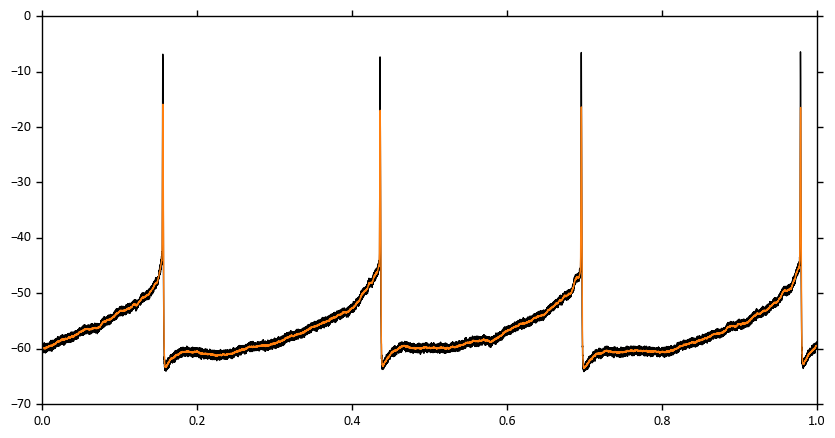

In [4]:
plt.plot(df.xs('sweep001')['time'],df.xs('sweep001')['primary'])

# or...

def swp1_rollavg(df):
    x = df.xs('sweep001')['time']
    y = df.xs('sweep001')['primary'].rolling(10,center=True).mean()
    return x, y

x, y = swp1_rollavg(df)
plt.plot(x,y);

# Dan and I have made your lives easier

# read_abf module
---

### read_abf: 
- turn your abf files into pandas dataframes

### keep_sweeps: 
- keep only the sweeps you want

### drop_sweeps: 
- get rid of the sweeps you want


# [nuplot module](https://github.com/surmeierlab/tutorials/blob/master/Nuplot%20tutorial.ipynb)
---

### simple/clean_axis/figure: 
- removes portions or all of the figure outlines and axes

### nu_boxplot: 
- make a more Surmeier-ready boxplot

### nu_scatter: 
- columnar scatterplots (for use with boxplots) with lots of options

## nu_raster, nu_violin, also building a simpler heatmap function

# oscillation module
---

### create_epoch: 
- blocks dataframe into equal sized epochs (may overlap)

### epoch_hist/kde/pgram:
- run a histogram/kernel density estimation/periodogram on epochs
